In [24]:
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
%matplotlib inline
import seaborn as sns
from yahoofinancials import YahooFinancials

In [41]:
#Five year data 
start_sp = datetime.datetime(2014, 10, 1)
end_sp = datetime.datetime(2021, 10, 1)

#create dataframes

#Bitcoin 
VGT_df_five = pdr.get_data_yahoo('VGT', start_sp, end_sp)
VGT_df = pdr.get_data_yahoo('VGT', start_sp, end_sp)
VGT_df['Close'][-1]

406.8599853515625

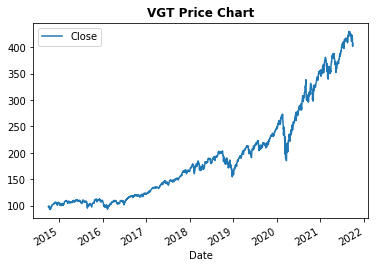

In [42]:
VGT_df_five.plot(y="Close")
plt.title("VGT Price Chart", weight="bold");

In [43]:
#Drop extra columns to be left with closing price 
VGT_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
VGT_df_five.head()

,Close
Date,
2014-10-01,98.430000
2014-10-02,98.470001
2014-10-03,99.349998
2014-10-06,99.209999
2014-10-07,97.529999


In [44]:
# calculate daily returns of VGT
VGT_df_five_returns = VGT_df_five.pct_change()
VGT_df_five_returns.head()

,Close
Date,
2014-10-01,NaN
2014-10-02,0.000406
2014-10-03,0.008937
2014-10-06,-0.001409
2014-10-07,-0.016934


In [45]:
VGT_df_five_returns = VGT_df_five_returns.rename(columns = {"Close": "VGT Daily Returns"}) 
VGT_df_five_returns = VGT_df_five_returns.fillna(0, inplace=False)
VGT_df_five_returns.head()

,VGT Daily Returns
Date,
2014-10-01,0.000000
2014-10-02,0.000406
2014-10-03,0.008937
2014-10-06,-0.001409
2014-10-07,-0.016934


In [46]:
# calculate the mean of daily returns for VGT
avg_VGT_df_five_returns = VGT_df_five_returns.mean()['VGT Daily Returns']
avg_VGT_df_five_returns

# calculate the standard deviation of daily returns for VGT

std_VGT_df_five_returns = VGT_df_five_returns.std()['VGT Daily Returns']
std_VGT_df_five_returns

0.01403349381309831

In [47]:
# Sets the number of simulations, trading days, and gets the last closing price of VGT from DataFrame
num_simulations = 1000
num_trading_days = 365
VGT_last_price = VGT_df['Close'][-1]
# Initializes an empty DataFrame to hold simulated prices for each simulation
simulated_VGT_price_df = pd.DataFrame()

# Run the simulations of projecting VGT prices for the next trading year, `n` times
for n in range(num_simulations):

    # Initializes the simulated prices list with the last closing price of VGT
    simulated_VGT_prices = [VGT_last_price]
    
    # Simulates the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_VGT_prices[-1] * (1 + np.random.normal(avg_VGT_df_five_returns, std_VGT_df_five_returns))
        # Append the simulated price to the list
        simulated_VGT_prices.append(simulated_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_VGT_price_df[f"Simulation {n+1}"] = pd.Series(simulated_VGT_prices)

# Print head of DataFrame
simulated_VGT_price_df.tail()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
361,641.951728,820.539858,587.409835,423.044044,490.566988,830.745665,349.600821,258.463432,341.555120,847.457921,...,668.596721,507.642060,459.262456,648.264602,650.087133,598.413781,395.761869,464.096525,1051.382111,841.993546
362,649.108833,819.290392,574.679031,423.357097,490.486297,824.660818,348.678661,251.473188,351.181926,838.447093,...,661.251592,490.883562,468.013336,629.713972,652.202620,598.326023,398.377445,465.251145,1053.157896,819.978271
363,640.849746,792.040496,575.560851,426.498544,496.003296,811.421233,352.980605,250.199928,352.980983,845.985849,...,663.384850,488.773870,469.263047,631.643449,657.877408,602.215641,397.360763,465.146221,1078.388557,816.566818
364,618.290282,762.779473,583.678823,423.987433,502.403968,802.152442,350.783378,254.431219,361.659102,843.896119,...,674.714592,492.219176,473.906535,630.889772,649.238179,588.364171,413.919483,474.508049,1098.898934,809.769451
365,634.382541,768.965422,571.462999,423.740053,498.761025,802.595163,347.139126,255.653719,360.822076,838.687873,...,668.391879,496.110222,474.018702,642.158435,656.849978,608.443175,415.281523,463.103005,1072.995633,800.728945


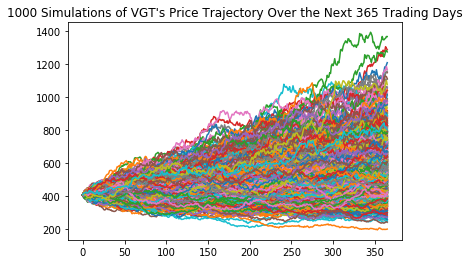

In [48]:
# the trajectory of VGT stock based on a x trading day simulation
plot_title = f"{n+1} Simulations of VGT's Price Trajectory Over the Next 365 Trading Days"
simulated_VGT_price_df.plot(legend=None, title=plot_title)

In [49]:
# a list of the last price for each simulation for VGT
VGT_simulated_ending_prices = simulated_VGT_price_df.iloc[-1, :]
VGT_simulated_ending_prices.head()

Simulation 1    634.382541
Simulation 2    768.965422
Simulation 3    571.462999
Simulation 4    423.740053
Simulation 5    498.761025
Name: 365, dtype: float64

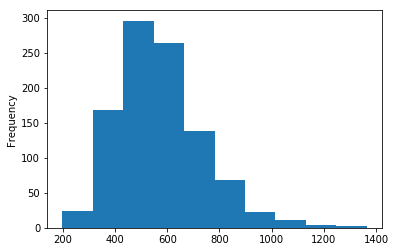

In [50]:
# a frequency distribution of simulated ending prices
VGT_simulated_ending_prices.plot(kind='hist')

In [51]:
#the 95% confidence interval for simulated ending prices
confidence_interval = VGT_simulated_ending_prices.quantile(q=[0.025, 0.975])
confidence_interval

0.025    319.732935
0.975    961.079431
Name: 365, dtype: float64

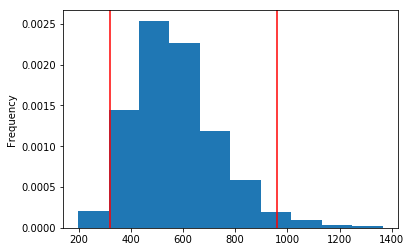

In [52]:
# a probability distribution histogram of simulated ending prices with markings for a 95% confidence interval
plt.figure();
VGT_simulated_ending_prices.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [53]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - VGT_last_price) / VGT_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - VGT_last_price) / VGT_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in VGT"
      f" over the next 365 trading days will end within in the range of"
      f" ${ending_investment_lower_bound} and ${ending_investment_upper_bound}")

There is a 95% chance that an initial investment of $10,000 in VGT over the next 365 trading days will end within in the range of $7858.549537896247 and $23621.87155020394
